# Housing Price Prediction Assignment

## Problem Statement

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not

## Goal

### 1. Identify which variables are significant in predicting the price of a house.
### 2. How well those variables describe the price of a house.
### 3. Determine the optimal value of lambda for ridge and lasso regression.

## Approach

### 1. Data Exploration
### 2. Data Visualisation
### 3. Data Preparation
### 4. Model building and evaluation

### Data Exploration`

#### Importing required libraries and reading the data.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
housing = pd.read_csv('train.csv')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing.shape

(1460, 81)

#### checking for null values

In [8]:
cols_to_drop=[]
missing_df=pd.DataFrame(index=housing.columns)
for i in housing.columns:
    missing_value_precent=(housing[i].isnull().sum()/len(housing))*100
    missing_df.loc[i,'missing_value_precent']=missing_value_precent

In [9]:
missing_df=missing_df.sort_values(by='missing_value_precent',ascending=False)
missing_df

,missing_value_precent
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
...,...
ExterQual,0.000000
Exterior2nd,0.000000
Exterior1st,0.000000
RoofMatl,0.000000


Dropping the columns that are having greater than or equal to 80% null values

In [11]:
housing=housing.drop(missing_df[missing_df.missing_value_precent>=80].index,errors='ignore',axis=1)

# As Id column i unique and not used in analysis dropping the ID column
housing=housing.drop('Id',errors='ignore',axis=1)

### Categorical and Numerical columns

In [12]:
num_cols=[]
cat_cols=[]
for i in housing.columns:
    if np.dtype(housing[i])==np.dtype('O'):
        cat_cols.append(i)
    else:
        num_cols.append(i)
cat_cols_with_nulls = missing_df.loc[cat_cols,:][missing_df.missing_value_precent>0.0]
num_cols_with_nulls = missing_df.loc[num_cols,:][missing_df.missing_value_precent>0.0]
cat_cols_with_nulls

,missing_value_precent
MasVnrType,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274
GarageType,5.547945
GarageFinish,5.547945


#### Missing value imputation for categorical columns

In [14]:
for i in cat_cols_with_nulls.index:
    print(i,'\n',housing[i].unique())

MasVnrType 
 ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual 
 ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond 
 ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure 
 ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 
 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu 
 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish 
 ['RFn' 'Unf' 'Fin' nan]
GarageQual 
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond 
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [15]:
#Replacing null values of MasVnrType with most frequent value 'None'
housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0],inplace=True)

In [16]:
#Replacing nan values of BsmtExposure, BsmtFinType2, BsmtQual, BsmtFinType1, BsmtCond with 'No Basement' as nan indicates no basement present.
for i in ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing[i].fillna('No Basement',inplace=True)

#Replacing nan values of GarageType, GarageFinish, GarageQual, GarageCond with 'No Garage' as nan indicates no garage present.
for i in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing[i].fillna('No Garage',inplace=True)

#Replacing null values of Electrical with most frequent value 'SBrkr'
housing['Electrical'].fillna(housing['Electrical'].mode()[0],inplace=True)

#Replacing nan values of FireplaceQu with 'No Fireplace' 
housing['FireplaceQu'].fillna('No Fireplace',inplace=True)



#### Missing value imputation for numerical columns

In [18]:
num_cols_with_nulls

,missing_value_precent
LotFrontage,17.739726
MasVnrArea,0.547945
GarageYrBlt,5.547945


In [19]:
#Replacing null values of LotFrontage and GarageYrBlt with median values
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median(),inplace=True)

In [20]:
#As null values are very less in MasVnrArea dropping them
housing.dropna(inplace=True)

In [21]:
# Checking if there are any null values present
for i in housing.columns:
    print(i,':',(housing[i].isnull().sum()/len(housing))*100)

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.0
LotArea : 0.0
Street : 0.0
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.0
MasVnrArea : 0.0
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.0
BsmtCond : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.0
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.0
GarageType : 0.0
GarageYrBlt : 0.0
GarageFinish : 0.0
Gar

In [22]:
housing.shape

(1452, 76)

#### Derived Features

In [23]:
# Creating Property_age column from YrSold and Yearbuilt
housing['Property_age']=housing['YrSold'] - housing['YearBuilt']
#Dropping the redundant columns
housing.drop(['YrSold','YearBuilt','MoSold','YearRemodAdd'],axis=1,inplace=True,errors='ignore')

### Data Visualization

In [25]:
#categorical columns
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

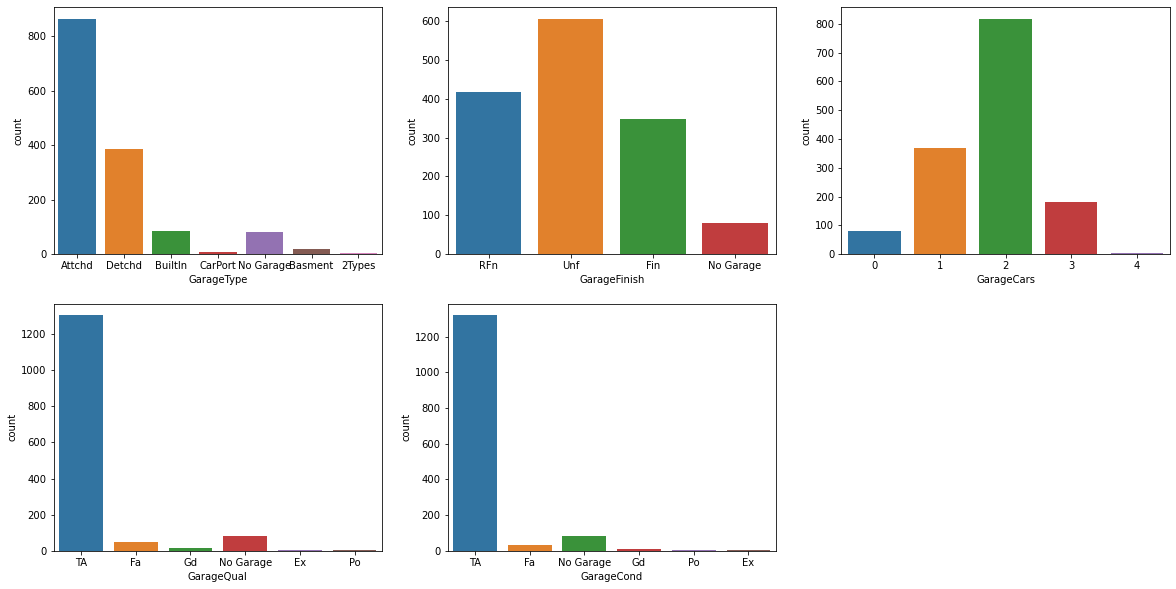

In [26]:
plt.figure(figsize=(20,10))
pstn=1
for i in ['GarageType','GarageFinish','GarageCars','GarageQual','GarageCond']:
    plt.subplot(2,3,pstn)
    sns.countplot(x=i,data=housing)
    pstn=pstn+1
plt.show()

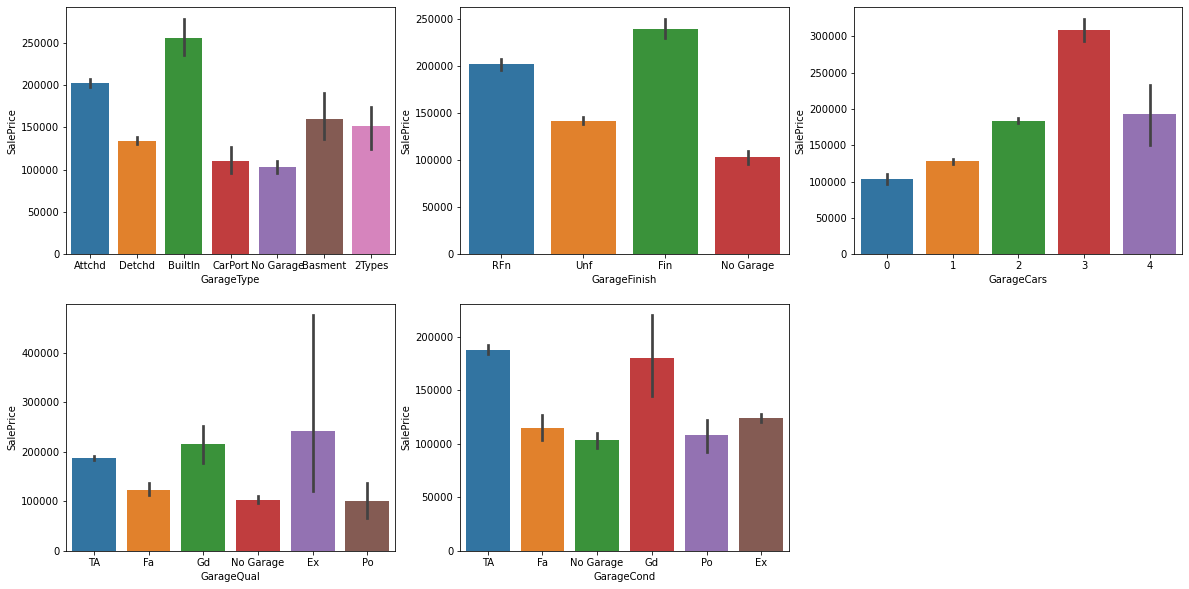

In [27]:
plt.figure(figsize=(20,10))
pstn=1
for i in ['GarageType','GarageFinish','GarageCars','GarageQual','GarageCond']:
    plt.subplot(2,3,pstn)
    sns.barplot(x=i,y='SalePrice',data=housing)
    pstn=pstn+1
plt.show()

Inference : SalePrice for houses with builtin and finished garages is high.
            Houses with garages of good/excellent quality and are in good/average condition and that
            can accomodate 3 cars seems to have high price
            

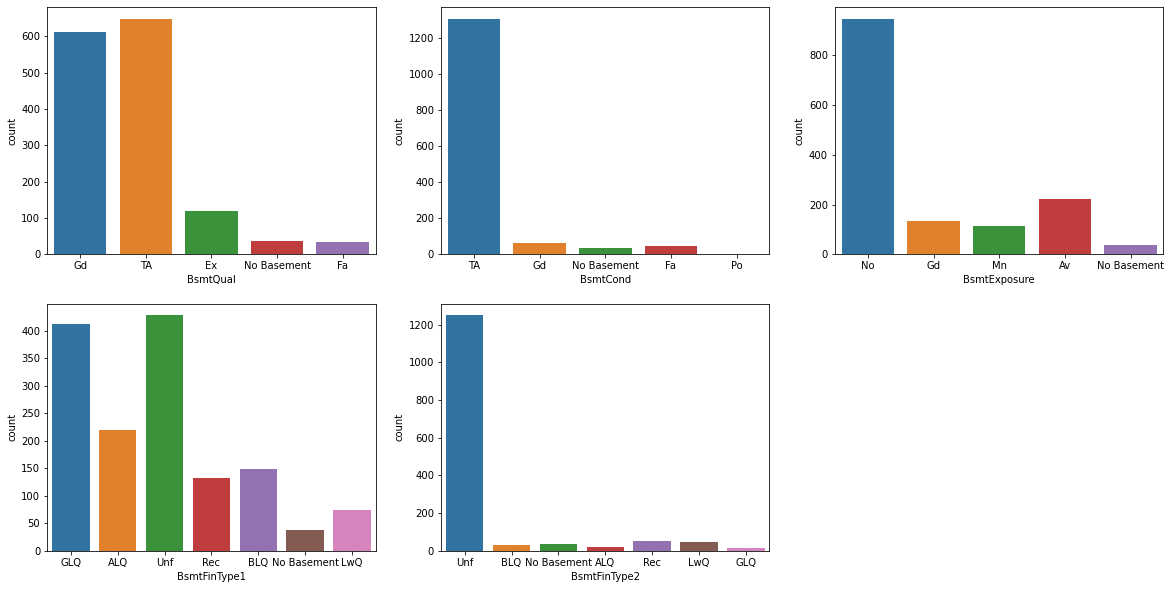

In [28]:
plt.figure(figsize=(20,10))
pstn=1
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    plt.subplot(2,3,pstn)
    sns.countplot(x=i,data=housing)
    pstn=pstn+1
plt.show()

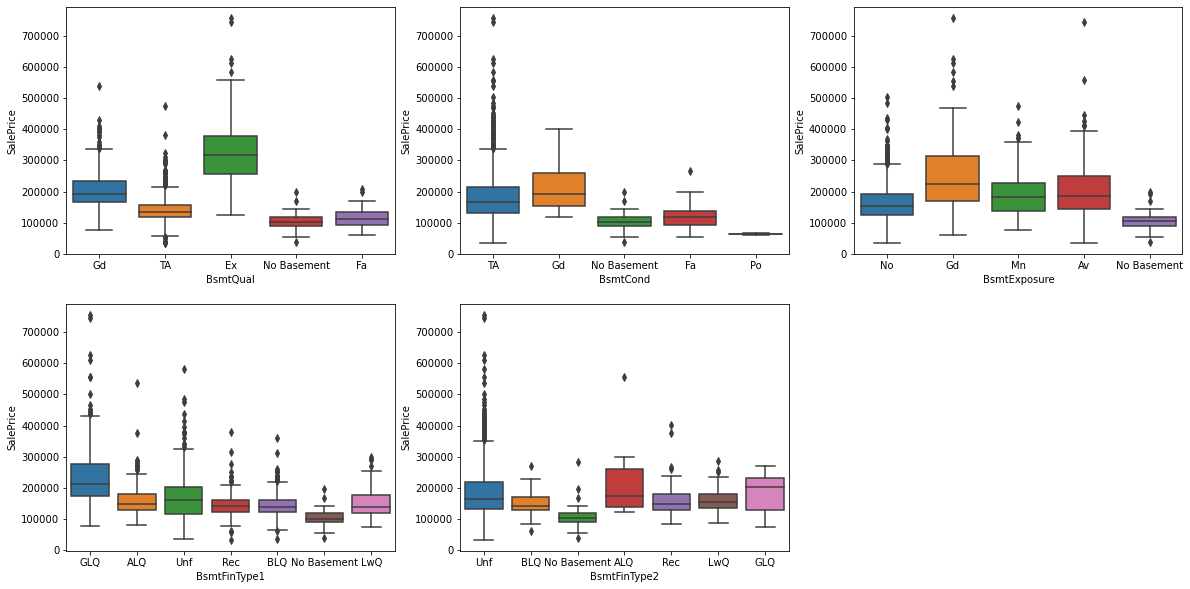

In [29]:
plt.figure(figsize=(20,10))
pstn=1
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    plt.subplot(2,3,pstn)
    sns.boxplot(x=i,y='SalePrice',data=housing)
    pstn=pstn+1
plt.show()

Inference : Houses with excellent quality basement that are in good condition and having good exposure with good rating(GLQ) 
            seems to have high sale price

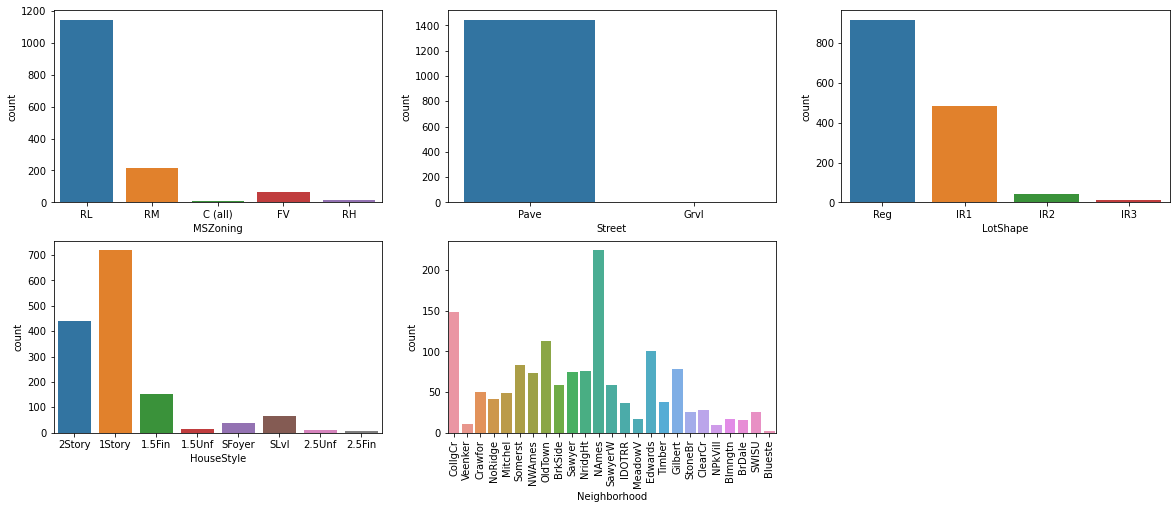

In [30]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['MSZoning','Street','LotShape','HouseStyle','Neighborhood']:#,'RoofStyle']:#'MasVnrType','ExterQual','Foundation','Heating','Electrical','CentralAir','FireplaceQu','SaleType']:
    plt.subplot(3,3,pstn)
    sns.countplot(x=i,data=housing)
    pstn=pstn+1
plt.xticks(rotation=90)
plt.show()


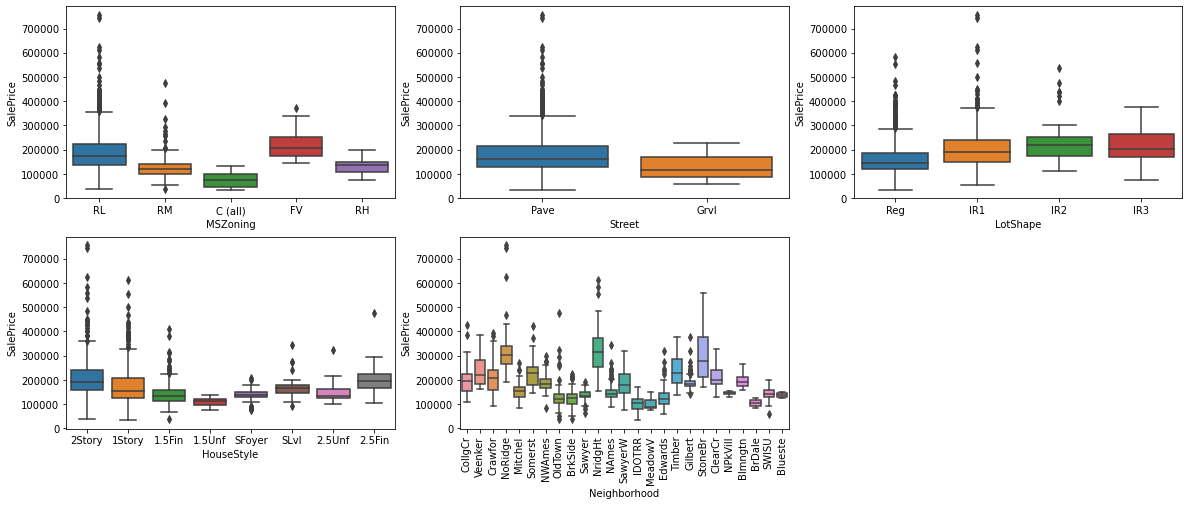

In [31]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['MSZoning','Street','LotShape','HouseStyle','Neighborhood']:
    plt.subplot(3,3,pstn)
    sns.boxplot(x=i,y='SalePrice',data=housing)
    pstn=pstn+1
plt.xticks(rotation=90)
plt.show()


Inference : Floating village residential houses and the houses with paved road access to property seems to have high sale price.
            Except for Reg,all the other three lot shapes seems to have same sale price.Sale price for 2 story and 2 and half story houses is high
            Nridght and StoneBr seems to have high demand.
            

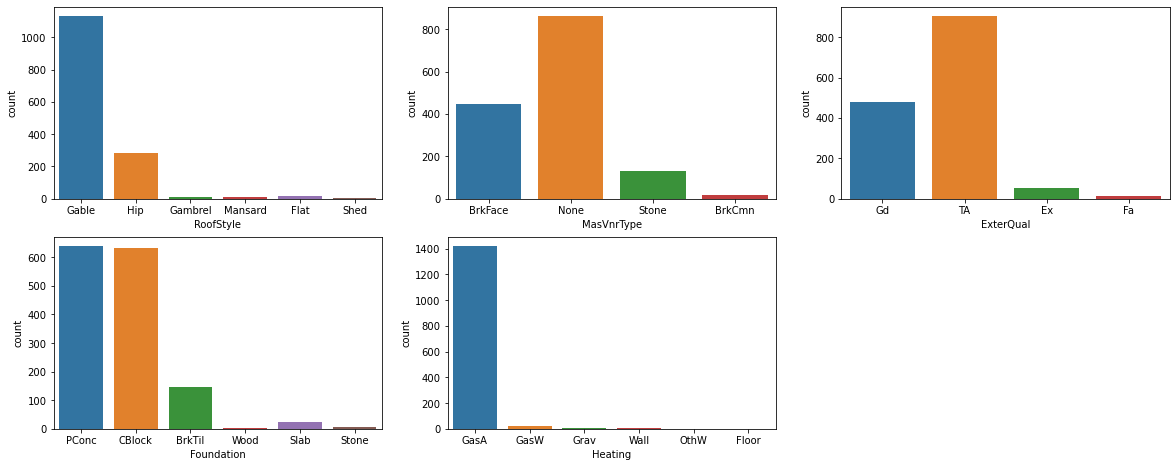

In [32]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['RoofStyle','MasVnrType','ExterQual','Foundation','Heating']:
    plt.subplot(3,3,pstn)
    sns.countplot(x=i,data=housing)
    pstn=pstn+1
plt.show()


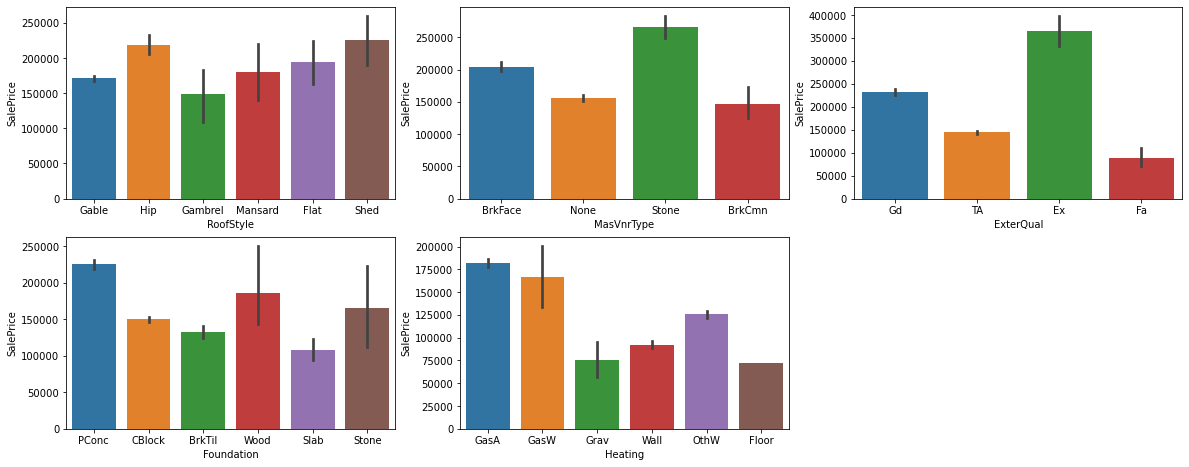

In [33]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['RoofStyle','MasVnrType','ExterQual','Foundation','Heating']:
    plt.subplot(3,3,pstn)
    sns.barplot(x=i,y='SalePrice',data=housing)
    pstn=pstn+1
plt.show()


Inference : Houses with hip/shed roof style and stone masvnr type and having excellent exterior quality seems to have high price.
            Houses with poured concrete/wood/stone and having GasA/GasW type of heating seems to be high in demand.

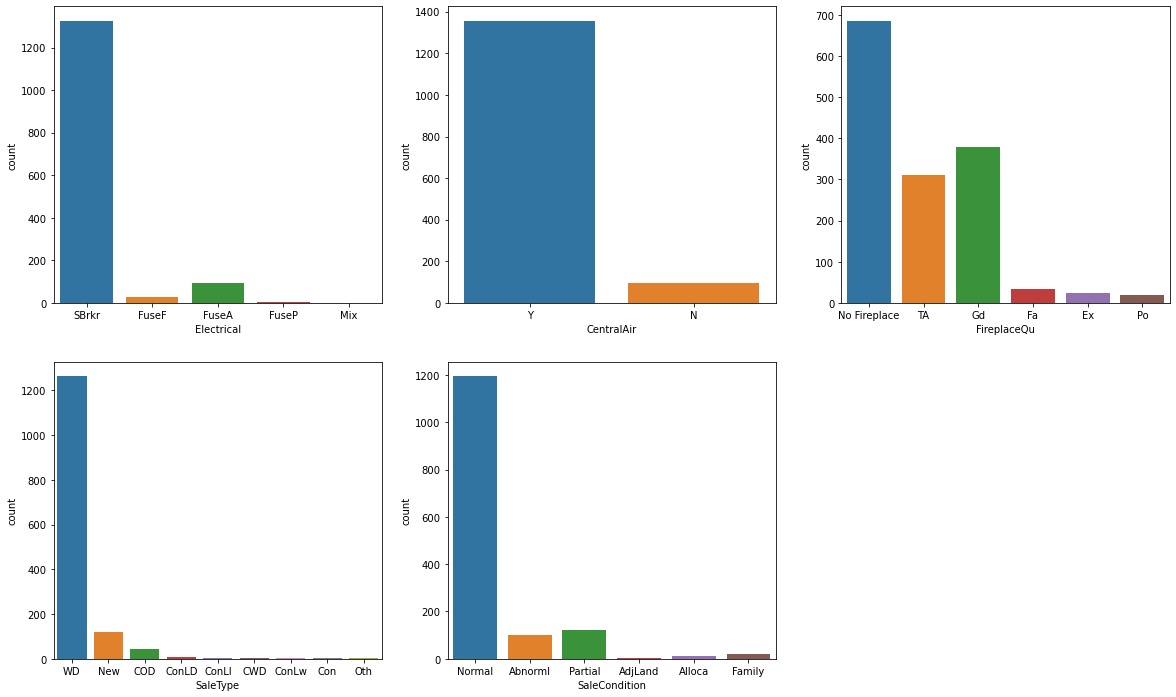

In [34]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['Electrical','CentralAir','FireplaceQu','SaleType','SaleCondition']:
    plt.subplot(2,3,pstn)
    sns.countplot(x=i,data=housing)
    pstn=pstn+1
plt.show()


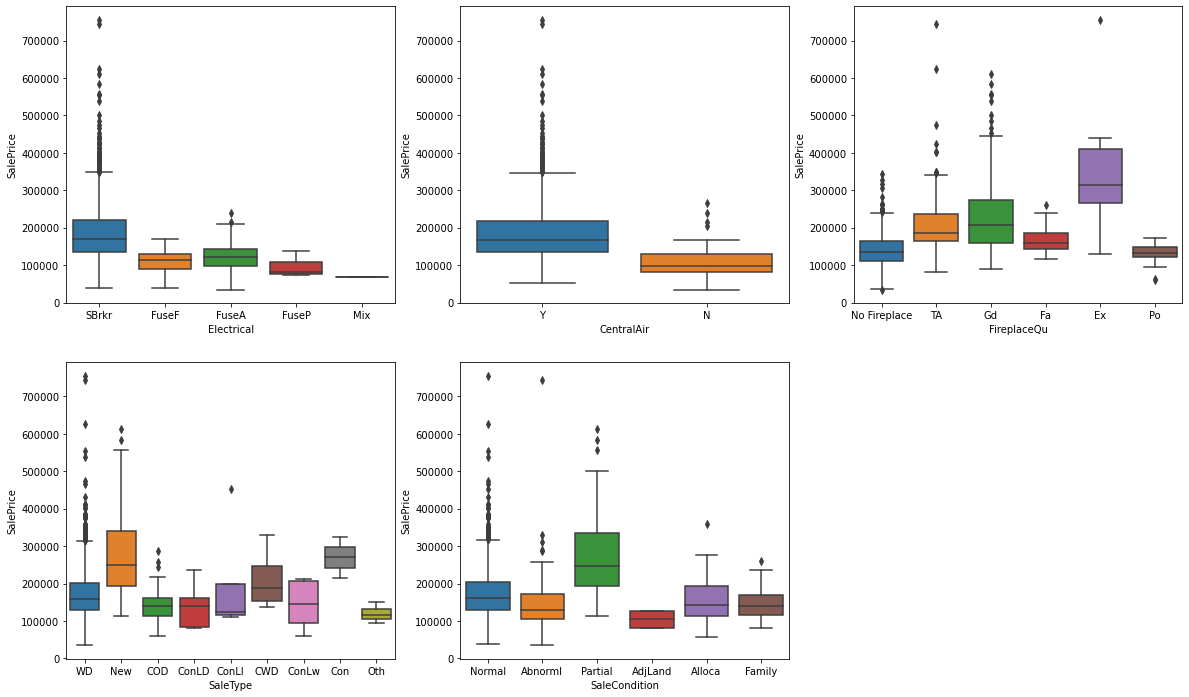

In [35]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['Electrical','CentralAir','FireplaceQu','SaleType','SaleCondition']:
    plt.subplot(2,3,pstn)
    sns.boxplot(x=i,y='SalePrice',data=housing)
    pstn=pstn+1
plt.show()


Inference : Houses with SBrkr Electrical system with air conditioning and with excellent fireplace quality seems to have high price
            Houses that are new / that are under construction(partial) when last assessed seems to have high price.

<AxesSubplot:>

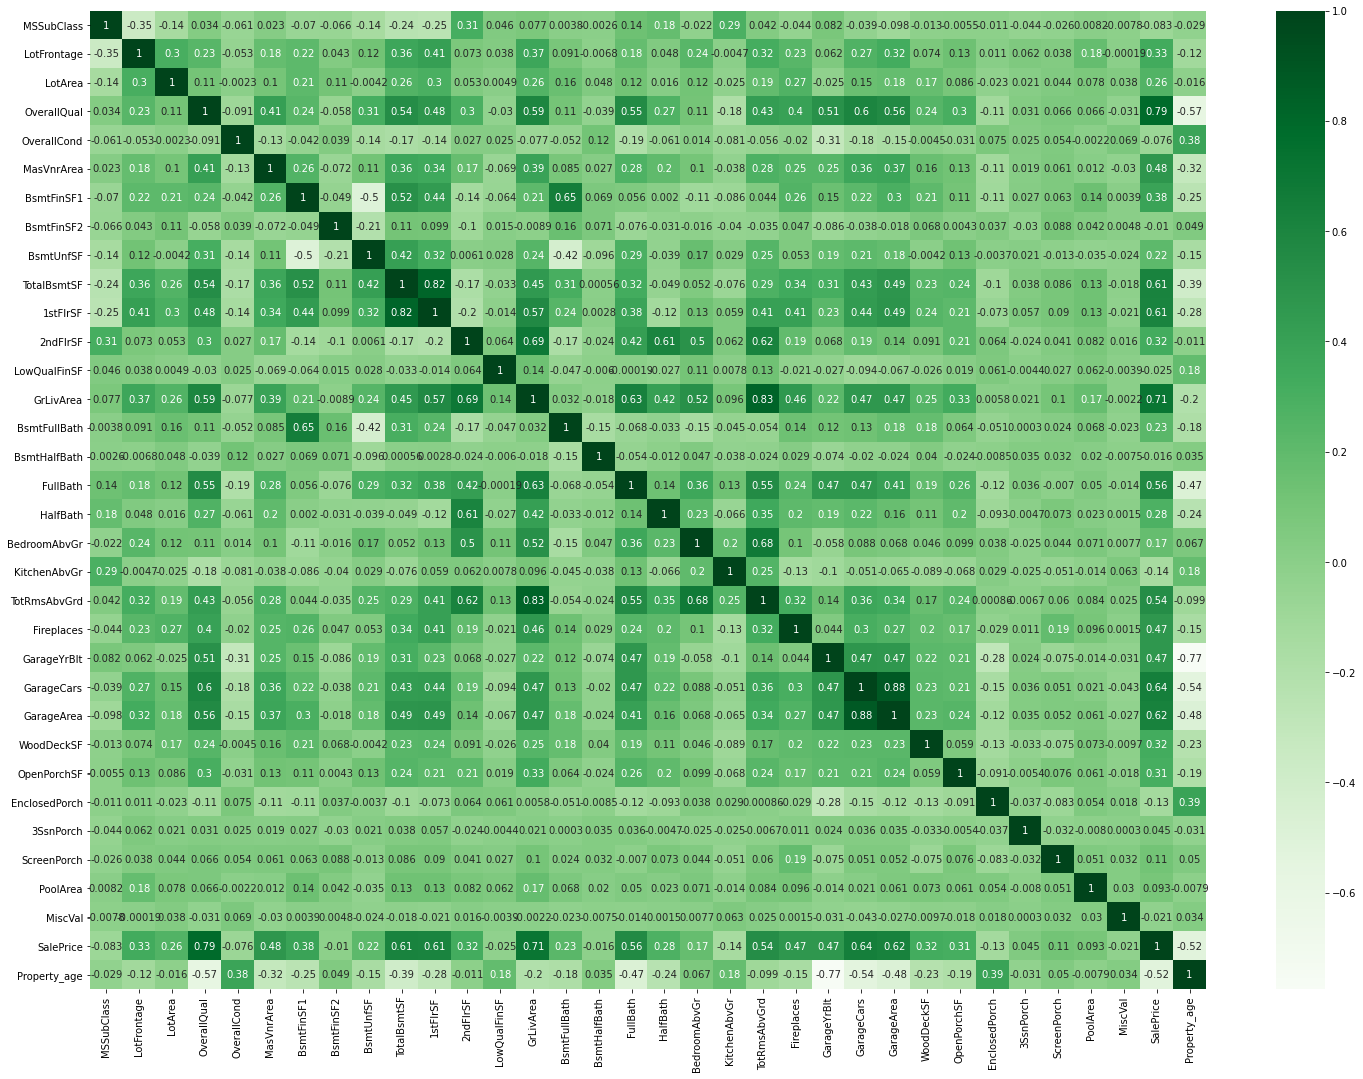

In [36]:
# correlation matrix to check if there is multi collinearity between predictor variables
housing_corr=housing.corr()
plt.figure(figsize=(25,18))
sns.heatmap(housing.corr(),annot=True,cmap='Greens')

In [37]:
lst=[]
for i in housing_corr.columns:
    for j in [k for k in housing_corr.columns if k!=i]:
        a=housing_corr.loc[i,j]
        if abs(a)>=0.70:
            lst.append((i,j,a))
lst        

[('OverallQual', 'SalePrice', 0.7899971370270429),
 ('TotalBsmtSF', '1stFlrSF', 0.818246258691743),
 ('1stFlrSF', 'TotalBsmtSF', 0.818246258691743),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8254761352426164),
 ('GrLivArea', 'SalePrice', 0.7100796834099271),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8254761352426164),
 ('GarageYrBlt', 'Property_age', -0.7747025880933657),
 ('GarageCars', 'GarageArea', 0.8823315816048091),
 ('GarageArea', 'GarageCars', 0.8823315816048091),
 ('SalePrice', 'OverallQual', 0.7899971370270429),
 ('SalePrice', 'GrLivArea', 0.7100796834099271),
 ('Property_age', 'GarageYrBlt', -0.7747025880933657)]

In [38]:
#Dropping the high correlated columns
housing=housing.drop(['1stFlrSF','GarageArea','TotRmsAbvGrd','GarageYrBlt'],axis=1,errors='ignore')

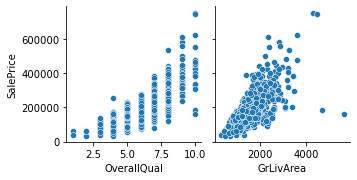

In [40]:
sns.pairplot(x_vars=['OverallQual','GrLivArea'],y_vars=['SalePrice'],data=housing)

Inference : OverallQual and GLiveArea are highly correlated with atrget variable SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

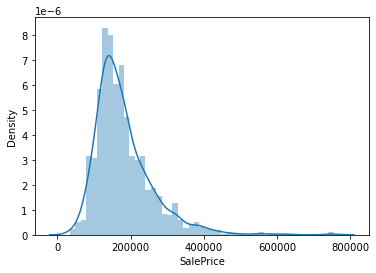

In [41]:
#saleprice distribution
sns.distplot(housing.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

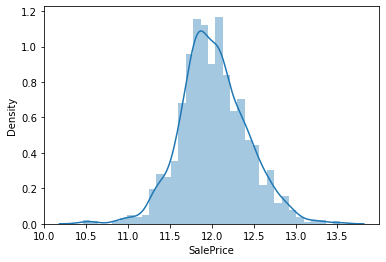

In [42]:
##right skewed hence applying log distribution
housing['SalePrice'] = np.log(housing['SalePrice'])
sns.distplot(housing.SalePrice)
#now its normally distributed

In [43]:
num_cols = [i for i in housing.columns if np.dtype(housing[i])!=np.dtype('O')]
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Property_age']

<Figure size 1440x720 with 0 Axes>

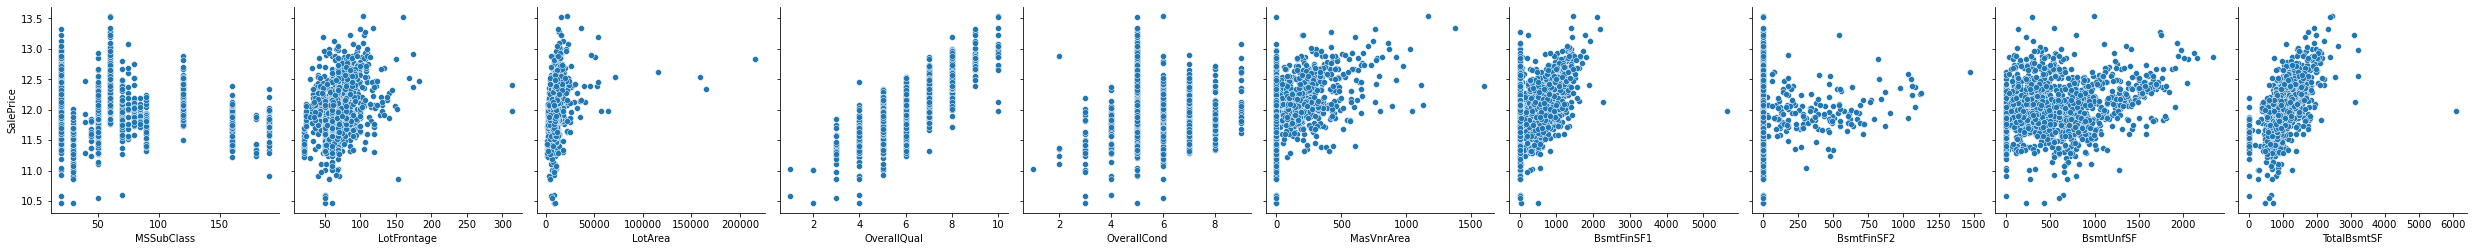

In [44]:
## Below plot show how Saleprice varies for each preditcor variable
y='SalePrice'
plt.figure(figsize=(20,10))
sns.pairplot(x_vars=num_cols[:10],y_vars=y,data=housing,size=3.5)

<Figure size 1800x1080 with 0 Axes>

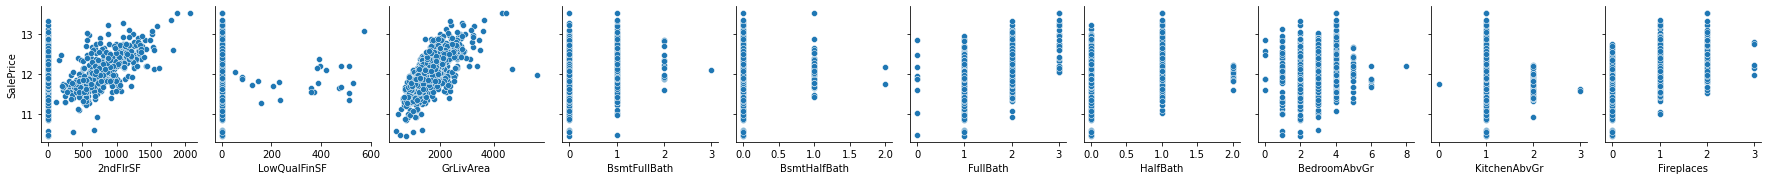

In [45]:
plt.figure(figsize=(25,15))
sns.pairplot(x_vars=num_cols[10:20],y_vars=y,data=housing,size=2.5)

<Figure size 1800x1080 with 0 Axes>

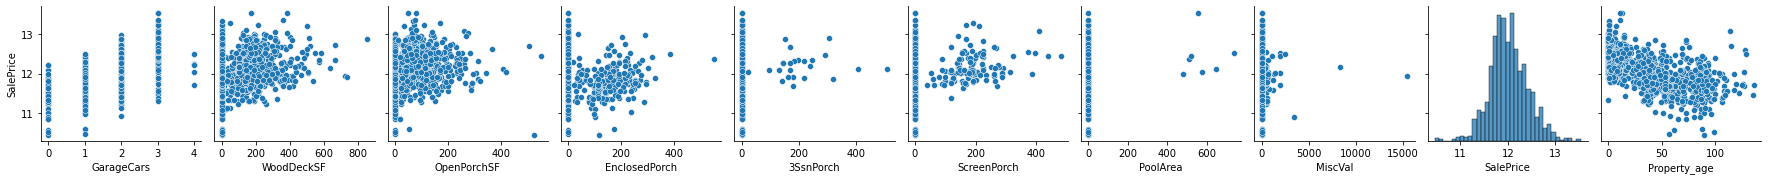

In [46]:
plt.figure(figsize=(25,15))
sns.pairplot(x_vars=num_cols[20:],y_vars=y,data=housing,size=2.5)

In [47]:
#creation fo two dataframes for categorical and numerical columns
housing_num = housing[num_cols]
housing_cat=housing[cat_cols]


<AxesSubplot:>

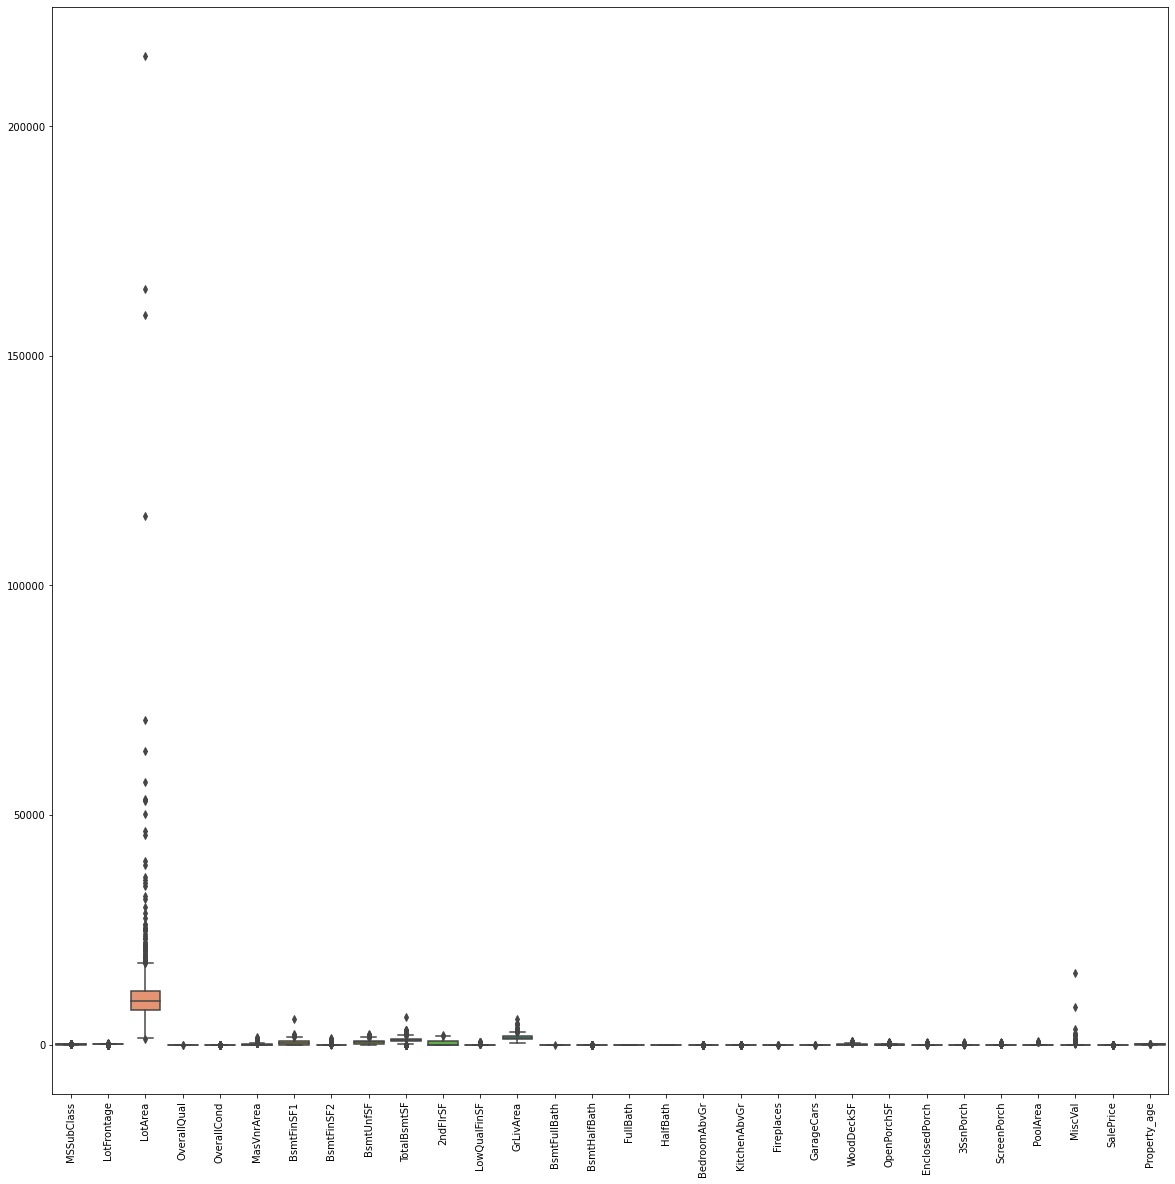

In [49]:
## Checking for outliers for numerical columns
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.boxplot(data=housing_num)

In [50]:
#Outlier treatment
for i in housing_num.columns:
    housing_num[i][housing_num[i]>=housing_num[i].quantile(0.95)]=housing_num[i].quantile(0.95)
    housing_num[i][housing_num[i]<=housing_num[i].quantile(0.05)]=housing_num[i].quantile(0.05)


<AxesSubplot:>

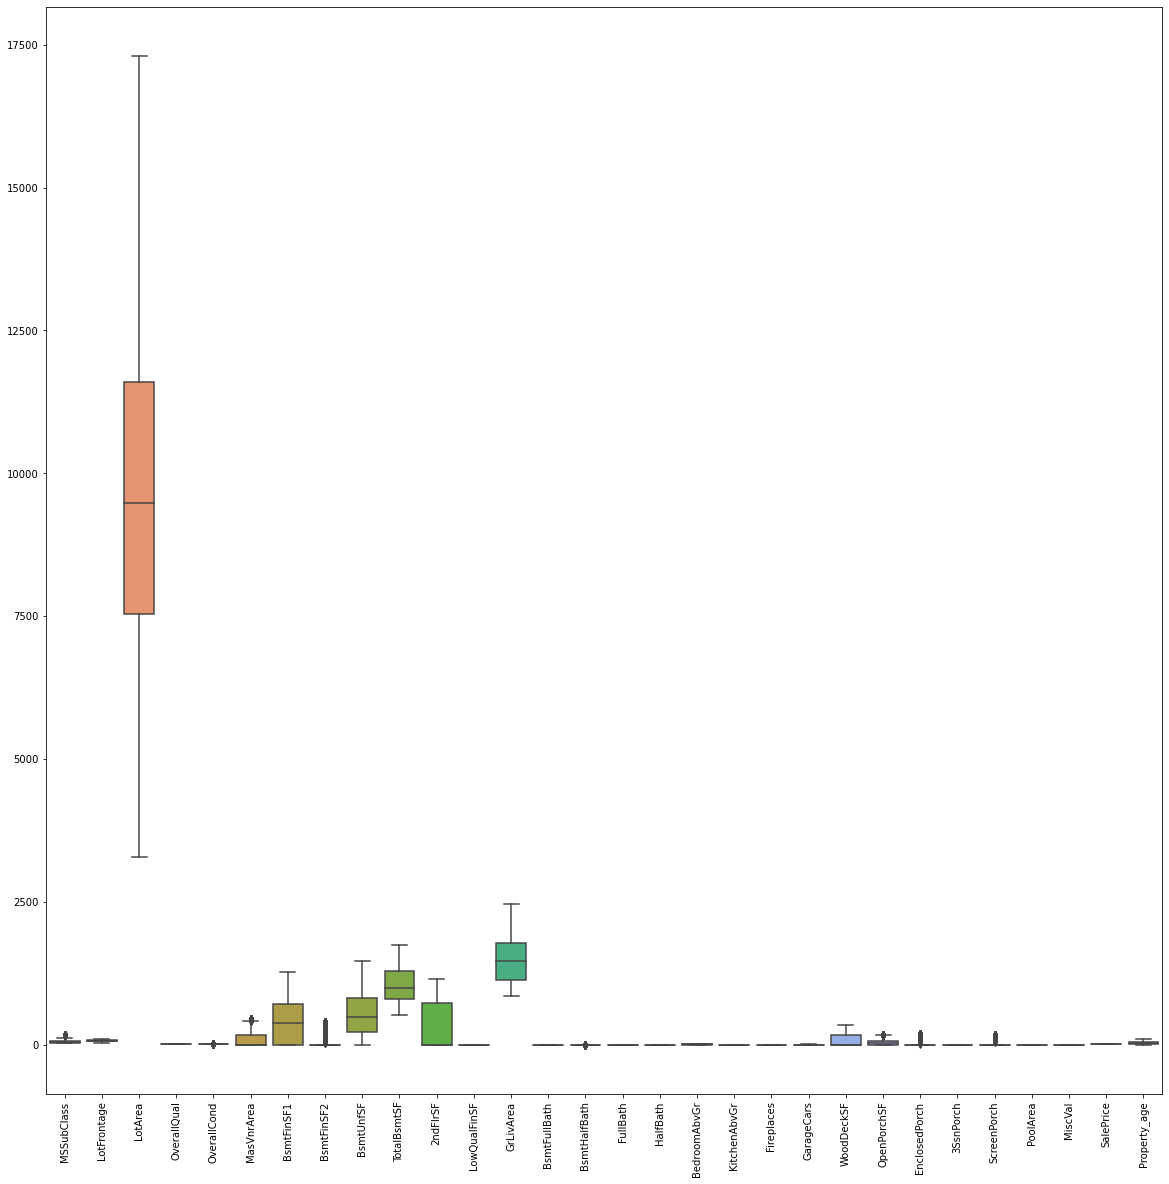

In [52]:
#box plots for numerical columsn after outlier treatment " no outliers present now"
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.boxplot(data=housing_num)

### Data Preparation

In [53]:
#Creation of dummy variables for categorical columns
housing_cat_dummy = pd.get_dummies(housing_cat,drop_first=True)

In [54]:
housing_1=pd.concat([housing_num,housing_cat_dummy],axis=1)

In [55]:
housing_1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,196.0,706.0,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,6,8,0.0,978.0,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,7,5,162.0,486.0,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,7,5,0.0,216.0,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,8,5,350.0,655.0,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


#### Train test split

In [56]:
y=housing_1.pop('SalePrice')
X=housing_1

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=40)

In [58]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1016, 239), (1016,), (436, 239), (436,))

In [59]:
scaler=StandardScaler()
num_cols.remove('SalePrice')

In [60]:

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
718,0.132739,1.581156,0.192430,0.777024,-0.599126,2.626230,1.813946,-0.337546,-1.022338,0.745730,...,0,0,0,0,1,0,0,0,1,0
1029,2.691814,-2.079028,-1.941963,-0.036010,1.361300,1.368445,-0.265806,-0.337546,-0.496500,-1.109967,...,0,0,0,0,1,0,0,0,1,0
336,-0.890890,0.971126,1.254529,1.590059,-0.599126,0.786271,1.998597,-0.337546,0.274084,2.016838,...,0,0,0,0,1,0,0,0,1,0
1406,0.772508,-0.004923,-0.423676,-0.849045,1.361300,-0.651197,0.557834,-0.337546,-1.085342,-0.831177,...,0,0,0,0,1,0,0,0,1,0
1195,0.132739,-1.163982,-0.545898,-0.036010,-0.599126,-0.651197,-1.035995,-0.337546,0.407361,-0.947339,...,0,0,0,0,1,0,0,0,1,0


In [61]:
X_test[num_cols]=scaler.transform(X_test[num_cols])

###  Model Building and Evaluation

### Linear Regression 

In [211]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,100)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [212]:
#Top 150 columns
cols = X_train.columns[rfe.support_]
len(cols)

100

In [213]:
X_train_rfe= X_train[cols]
X_train_rfe = sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()

In [214]:
y_train_predict=lm.predict(X_train_rfe)
print(r2_score(y_train,y_train_predict))

0.9342298152518835


In [216]:
cols= [i for i in X_train_rfe.columns if i not in ('const')]
X_test_rfe= X_test[cols]
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_predict=lm.predict(X_test_rfe)
print(r2_score(y_test,y_test_predict))


0.8101463102021054


As training accuracy is high and test accuracy is low compared to training accuracy,there is overfitting of model and hence going for 
ridge/lasso regression

Ridge and Lasso Regression

#### Ridge Regression

In [62]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge=Ridge()
#cross validation
folds=5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.254910,0.489976,0.003387,0.000591,0.0001,{'alpha': 0.0001},-0.074985,-0.087527,-0.080871,-0.082580,...,-0.083428,0.005575,26,-0.057095,-0.053443,-0.054782,-0.057179,-0.053088,-0.055117,0.001743
1,0.009438,0.002720,0.003577,0.000582,0.001,{'alpha': 0.001},-0.074977,-0.087475,-0.080825,-0.082545,...,-0.083395,0.005569,25,-0.057098,-0.053455,-0.054787,-0.057187,-0.053095,-0.055124,0.001742
2,0.007649,0.000398,0.002582,0.000198,0.01,{'alpha': 0.01},-0.074892,-0.087047,-0.080393,-0.082232,...,-0.083098,0.005518,24,-0.057125,-0.053553,-0.054836,-0.057251,-0.053159,-0.055185,0.001728
3,0.007844,0.000576,0.002881,0.000372,0.05,{'alpha': 0.05},-0.074572,-0.086130,-0.078861,-0.081369,...,-0.082183,0.005404,23,-0.057250,-0.053859,-0.055039,-0.057446,-0.053402,-0.055399,0.001680
4,0.008940,0.001042,0.002881,0.000372,0.1,{'alpha': 0.1},-0.074269,-0.085521,-0.077602,-0.080680,...,-0.081420,0.005309,22,-0.057411,-0.054144,-0.055258,-0.057605,-0.053619,-0.055607,0.001641
5,0.007252,0.000398,0.003873,0.000581,0.2,{'alpha': 0.2},-0.073804,-0.084649,-0.075909,-0.079742,...,-0.080333,0.005166,21,-0.057675,-0.054586,-0.055722,-0.057855,-0.053939,-0.055956,0.001585
6,0.007948,0.000888,0.002879,0.000371,0.3,{'alpha': 0.3},-0.073456,-0.084060,-0.074783,-0.079016,...,-0.079621,0.005156,20,-0.057869,-0.054962,-0.056124,-0.058059,-0.054194,-0.056242,0.001536
7,0.008046,0.001105,0.003179,0.000921,0.4,{'alpha': 0.4},-0.073221,-0.083679,-0.074017,-0.078414,...,-0.079091,0.005122,19,-0.058034,-0.055266,-0.056453,-0.058239,-0.054433,-0.056485,0.001495
8,0.007252,0.001022,0.003179,0.000243,0.5,{'alpha': 0.5},-0.073007,-0.083412,-0.073485,-0.077891,...,-0.078665,0.005082,18,-0.058188,-0.055532,-0.056725,-0.058394,-0.054651,-0.056698,0.001459
9,0.010132,0.002404,0.003676,0.000398,0.6,{'alpha': 0.6},-0.072813,-0.083181,-0.073113,-0.077433,...,-0.078308,0.005030,17,-0.058326,-0.055765,-0.056955,-0.058543,-0.054840,-0.056886,0.001433


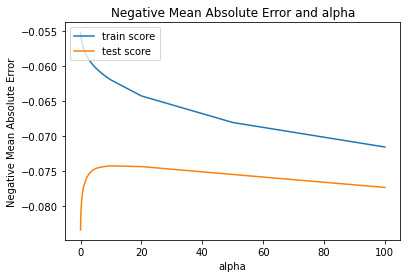

In [64]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting the graph for mean train score and mean test score 
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
cv_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.055117,-0.083428
1,0.0010,-0.055124,-0.083395
2,0.0100,-0.055185,-0.083098
3,0.0500,-0.055399,-0.082183
4,0.1000,-0.055607,-0.081420
5,0.2000,-0.055956,-0.080333
6,0.3000,-0.056242,-0.079621
7,0.4000,-0.056485,-0.079091
8,0.5000,-0.056698,-0.078665
9,0.6000,-0.056886,-0.078308


In [66]:
#optimum value for alpha is 10
print(model_cv.best_params_)

{'alpha': 10.0}


In [67]:
#Fitting Ridge model for alpha = 10 and printing coefficients.
alpha=10
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)
ridge.intercept_,ridge.coef_
sorted(list(zip(X_train.columns,ridge.coef_)),key=lambda x:x[1],reverse=True)

[('GrLivArea', 0.09218957534112629),
 ('Neighborhood_Crawfor', 0.07820731555008278),
 ('TotalBsmtSF', 0.0656136042324014),
 ('Exterior1st_BrkFace', 0.062074215533974665),
 ('OverallQual', 0.05709907689133081),
 ('SaleCondition_Normal', 0.05571406776929721),
 ('Condition2_Norm', 0.051590531408742486),
 ('Neighborhood_Somerst', 0.05082761902189953),
 ('Functional_Typ', 0.04956232016512657),
 ('SaleType_New', 0.04450834486282658),
 ('Condition1_Norm', 0.04313222681761655),
 ('OverallCond', 0.041363815615539416),
 ('Neighborhood_NridgHt', 0.041319941870526705),
 ('Neighborhood_StoneBr', 0.04060834726781781),
 ('Neighborhood_BrkSide', 0.038395961122766144),
 ('CentralAir_Y', 0.0351739299624627),
 ('SaleType_CWD', 0.03488364340739737),
 ('GarageQual_Gd', 0.033862753264242956),
 ('HouseStyle_SLvl', 0.03178928534405581),
 ('Heating_GasW', 0.03033057327188313),
 ('GarageType_Attchd', 0.029847193378009455),
 ('2ndFlrSF', 0.028793790760337095),
 ('GarageCars', 0.028454817500567005),
 ('LotConfig_

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("r2 score on train data:",r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("r2 score on test data:",r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("rss on train data:",rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("rss on test data:",rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print("mean square error on train data:",mse_train)

mse_test = mean_squared_error(y_test, y_pred_test)
print("mean square error on test data:",mse_test)


r2 score on train data: 0.9403316524430223
r2 score on test data: 0.9039127187880176
rss on train data: 7.4684129466062235
rss on test data: 5.330398866564036
mean square error on train data: 0.007350800144297464
mean square error on test data: 0.012225685473770726


### Lasso Regression

In [69]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso=Lasso()
#cross validation
folds=5
model_cv_lasso = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023866,0.007212,0.002793,0.002309,0.0001,{'alpha': 0.0001},-0.070867,-0.081928,-0.073795,-0.073837,...,-0.076448,0.004556,2,-0.059495,-0.057173,-0.058711,-0.060172,-0.055978,-0.058306,0.001534
1,0.009456,0.007722,0.000000,0.000000,0.001,{'alpha': 0.001},-0.072878,-0.078401,-0.076539,-0.070256,...,-0.074799,0.002884,1,-0.068857,-0.066758,-0.067465,-0.069348,-0.067004,-0.067886,0.001030
2,0.009385,0.007663,0.003125,0.006250,0.01,{'alpha': 0.01},-0.080494,-0.089863,-0.091001,-0.082951,...,-0.086431,0.004050,3,-0.085091,-0.083650,-0.083379,-0.084540,-0.083875,-0.084107,0.000624
3,0.007550,0.007005,0.008152,0.007021,0.05,{'alpha': 0.05},-0.107374,-0.120850,-0.121012,-0.103654,...,-0.114344,0.007345,4,-0.114346,-0.111715,-0.112848,-0.113678,-0.114059,-0.113329,0.000951
4,0.015729,0.000188,0.000000,0.000000,0.1,{'alpha': 0.1},-0.141855,-0.156549,-0.162488,-0.134783,...,-0.151040,0.010789,5,-0.151398,-0.148412,-0.149121,-0.150169,-0.150908,-0.150002,0.001105
5,0.015625,0.000004,0.000920,0.001839,0.2,{'alpha': 0.2},-0.222404,-0.235245,-0.245447,-0.209494,...,-0.230750,0.013161,6,-0.232227,-0.231367,-0.226009,-0.229480,-0.229377,-0.229692,0.002142
6,0.007604,0.003934,0.003366,0.001832,0.3,{'alpha': 0.3},-0.280368,-0.296054,-0.300307,-0.273260,...,-0.288934,0.010316,7,-0.290143,-0.286449,-0.285037,-0.292651,-0.286308,-0.288117,0.002836
7,0.010564,0.001355,0.004206,0.000738,0.4,{'alpha': 0.4},-0.280368,-0.296054,-0.300307,-0.273260,...,-0.288934,0.010316,7,-0.290143,-0.286449,-0.285037,-0.292651,-0.286308,-0.288117,0.002836
8,0.009568,0.001017,0.003398,0.000816,0.5,{'alpha': 0.5},-0.280368,-0.296054,-0.300307,-0.273260,...,-0.288934,0.010316,7,-0.290143,-0.286449,-0.285037,-0.292651,-0.286308,-0.288117,0.002836
9,0.009749,0.000739,0.004005,0.000631,0.6,{'alpha': 0.6},-0.280368,-0.296054,-0.300307,-0.273260,...,-0.288934,0.010316,7,-0.290143,-0.286449,-0.285037,-0.292651,-0.286308,-0.288117,0.002836


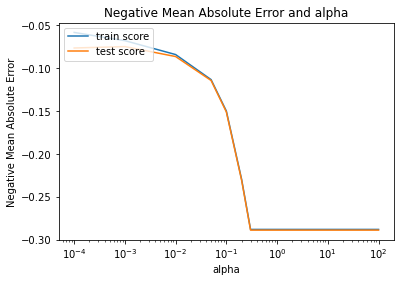

In [71]:
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
#optimum value fo alpha for lasso regression is 0.001
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [74]:
#Fitting lasso model for alpha = 0.001 and printing coefficients 
alpha=0.001
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso_coef_list = sorted(list(zip(X_train.columns,lasso.coef_)),key=lambda x:x[1],reverse=True)
lasso_coef_list.append(('constant',lasso.intercept_))
lasso_df = pd.DataFrame(data=lasso_coef_list,columns=['variable','coefficient'])
lasso_df

,variable,coefficient
0,GrLivArea,0.097835
1,Neighborhood_Crawfor,0.084064
2,OverallQual,0.070211
3,SaleType_New,0.067432
4,TotalBsmtSF,0.059408
...,...,...
235,KitchenQual_TA,-0.029422
236,Neighborhood_Edwards,-0.037046
237,MSZoning_RM,-0.044248
238,Property_age,-0.052372


In [75]:
lasso_df_significant_var=lasso_df[lasso_df.coefficient!=0]
lasso_df_significant_var

,variable,coefficient
0,GrLivArea,0.097835
1,Neighborhood_Crawfor,0.084064
2,OverallQual,0.070211
3,SaleType_New,0.067432
4,TotalBsmtSF,0.059408
...,...,...
235,KitchenQual_TA,-0.029422
236,Neighborhood_Edwards,-0.037046
237,MSZoning_RM,-0.044248
238,Property_age,-0.052372


In [76]:
lasso_df_significant_var.shape

(66, 2)

Conclusion : 66 Varibles out of total variables are useful in predicting the sale price using lasso regression

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("r2 score on train data:",r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2 score on test data:",r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print("rss on train data:",rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("rss on test data:",rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print("mean square error on train data:",mse_train)

mse_test = mean_squared_error(y_test, y_pred_test)
print("mean square error on test data:",mse_test)


r2 score on train data: 0.9280126243289016
r2 score on test data: 0.905304015487048
rss on train data: 9.010329101888553
rss on test data: 5.253217305653754
mean square error on train data: 0.00886843415540212
mean square error on test data: 0.012048663545077418


### Conclusion : 
    Optimum value of alpha for ridge regression is 10
    Optimum value of alpha for lasso regression is 0.001
    R2 score on train and test set for ridge regression are 0.94 and 0.90 respectively
    R2 score on train and test set for lasso regression are 0.92 and 0.90 respectively
    The top 5 predictor variables for saleprice prediction using ridge regression are:
        ('GrLivArea', 0.09218957534112629),
        ('Neighborhood_Crawfor', 0.07820731555008278),
        ('TotalBsmtSF', 0.0656136042324014),
        ('Exterior1st_BrkFace', 0.062074215533974665),
        ('OverallQual', 0.05709907689133081)
    The top 5 predictor variables for saleprice prediction using lasso regression are:
        (GrLivArea,0.097835)
        (Neighborhood_Crawfor,0.084064)
        (OverallQual,0.070211)
        (SaleType_New,0.067432)
        (TotalBsmtSF,0.05)
        

## Part2 Of Assignment

Question1 :What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model 
           if you choose double the value of alpha for both ridge and lasso? 
           What will be the most important predictor variables after the change is implemented?

    Optimum value of alpha for ridge regression is 10
    Optimum value of alpha for lasso regression is 0.001
    Double the value of alpha
    Ridge - alpha =20
    Lasso - alpha = 0.002

In [82]:
ridge =Ridge(alpha=20)
ridge.fit(X_train,y_train)
ridge_predictor_variables = sorted(list(zip(X_train.columns,ridge.coef_)),key=lambda x:x[1],reverse=True)
ridge_predictor_variables[:5]

[('GrLivArea', 0.08820408141015838),
 ('Neighborhood_Crawfor', 0.06284622367025135),
 ('TotalBsmtSF', 0.06127110926598349),
 ('OverallQual', 0.060506236538536456),
 ('Exterior1st_BrkFace', 0.04991669686566937)]

In [83]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train,r2_test

(0.9364774418035791, 0.9041188171835624)

In [84]:
lasso =Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
lasso_predictor_variables = sorted(list(zip(X_train.columns,lasso.coef_)),key=lambda x:x[1],reverse=True)
lasso_predictor_variables[:5]

[('GrLivArea', 0.09621406414387107),
 ('OverallQual', 0.07955920246096802),
 ('TotalBsmtSF', 0.0551667075588023),
 ('Neighborhood_Crawfor', 0.05191754378612108),
 ('OverallCond', 0.04538489336102607)]

In [85]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train,r2_test

(0.9176736241352745, 0.900595020105373)

    Ridge:
        R2 score on train and test set for ridge regression are 0.94 and 0.90 respectively for alpha =10
        R2 score on train and test set for ridge regression are 0.93 and 0.90 respectively for alpha =20
        Top 5 preditcor variables for alpha=20 are:
             ('GrLivArea', 0.08820408141015838),
             ('Neighborhood_Crawfor', 0.06284622367025135),
             ('TotalBsmtSF', 0.06127110926598349),
             ('OverallQual', 0.060506236538536456),
             ('Exterior1st_BrkFace', 0.04991669686566937)
        
    Lasso:
        R2 score on train and test set for lasso regression are 0.92 and 0.90 respectively for alpha=0.001
        R2 score on train and test set for lasso regression are 0.91 and 0.90 respectively for alpha=0.002
        Top 5 predictor variables for alpha=0.002 are 
              ('GrLivArea', 0.09621406414387107),
              ('OverallQual', 0.07955920246096802),
              ('TotalBsmtSF', 0.0551667075588023),
              ('Neighborhood_Crawfor', 0.05191754378612108),
              ('OverallCond', 0.04538489336102607)
        

 Question3 : After building the model, you realised that the five most important predictor variables in the 
            lasso model are not available in the incoming data. You will now have to create another model 
            excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [217]:
X_train_new_columns =  [i for i in X_train.columns if i not in ['GrLivArea','Neighborhood_Crawfor','OverallQual','SaleType_New','TotalBsmtSF']]
X_train_new = X_train[X_train_new_columns]

In [218]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso=Lasso()
#cross validation
folds=5
model_cv_lasso = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv_lasso.fit(X_train_new,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [219]:
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [220]:
lasso_new = Lasso(alpha=0.0001)
lasso_new.fit(X_train_new,y_train)
lasso_new.intercept_,lasso_new.coef_

(12.00435893413429,
 array([-9.61086654e-03,  4.54753583e-03,  2.96134740e-02,  4.22436460e-02,
         1.01170453e-02,  9.35971422e-02,  2.62787115e-02,  8.40555993e-02,
         1.00155920e-01,  0.00000000e+00,  1.68600276e-02,  1.48598235e-03,
         3.49091495e-02,  1.87840336e-02,  7.96163439e-03,  0.00000000e+00,
         1.74119835e-02,  3.74363034e-02,  1.10468917e-02,  1.13111598e-02,
         2.28199304e-03,  0.00000000e+00,  1.47151967e-02,  0.00000000e+00,
         0.00000000e+00, -2.56111565e-02,  0.00000000e+00,  3.96972149e-02,
         2.33334141e-02, -1.62967019e-02,  0.00000000e+00,  2.87976372e-02,
         4.57617840e-02, -1.90214623e-03,  0.00000000e+00, -1.59408523e-02,
        -8.40439393e-03, -1.11466542e-01,  2.28174974e-02, -4.35568072e-02,
        -1.58294111e-03, -5.37078140e-03,  1.42759683e-02, -3.11186318e-02,
         0.00000000e+00, -3.83316699e-02, -5.21617148e-03, -5.47052682e-02,
        -5.09871565e-02, -1.48121141e-01, -7.16463251e-02, -5.697027

In [221]:
lasso_new_predictor_variables = sorted(list(zip(X_train_new.columns,lasso_new.coef_)),key=lambda x:x[1],reverse=True)
lasso_new_predictor_variables[:5]

[('SaleType_CWD', 0.24989960939521258),
 ('Exterior1st_BrkFace', 0.1274435993563277),
 ('Exterior1st_Stone', 0.1118324734524794),
 ('2ndFlrSF', 0.10015591957292543),
 ('BsmtFinSF1', 0.0935971421983545)]